In [1]:
! python --version

Python 3.11.5


# Environment Setup

## Upgrade pip

In [2]:
! pip install --upgrade pip

# Install latest boto3,awscli, boto3-core

In [3]:
! pip install --no-build-isolation --force-reinstall \
    "boto3>=1.33.6" \
    "awscli>=1.31.6" \
    "botocore>=1.33.6"

  Using cached boto3-1.34.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached awscli-1.32.0-py3-none-any.whl.metadata (11 kB)
  Using cached botocore-1.34.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
  Using cached s3transfer-0.9.0-py3-none-any.whl.metadata (1.7 kB)
  Using cached docutils-0.16-py2.py3-none-any.whl (548 kB)
  Using cached PyYAML-6.0.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.1 kB)
  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
  Using cached rsa-4.7.2-py3-none-any.whl (34 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached urllib3-2.0.7-py3-none-any.whl.metadata (6.6 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached pyasn1-0.5.1-py2.py3-none-any.whl.metadata (8.6 kB)
Using cached boto3-1.34.0-py3-none-any.whl (139 kB)
Using cached awscli-1.32.0-py3-none-any.whl (4.3 MB)
Using cached botocore-1.34.0-py3-none-any.whl (11.8 MB)
Using cached PyYAML-6.0.

# Load the Library

In [4]:
import json
import os
import sys

import boto3
import botocore

bedrock = boto3.client(service_name="bedrock")
bedrock_runtime = boto3.client(service_name="bedrock-runtime")

#  Stability AI Model

### SDXL, a high-quality image generation model, excels in open photorealism, allowing diverse art styles without imposing a specific 'feel.' SDXL 1.0 emphasizes vibrant, accurate colors with improved contrast, lighting, and shadows in native 1024x1024 resolution. Notably, it tackles challenging concepts like hands, text, and spatial arrangements. Developed by Stability AI, a leading open-source generative AI company, SDXL finds applications in artwork generation, creative tooling, and education. This diffusion-based text-to-image model, version 1.0, showcases stability and proficiency, generating detailed images based on text descriptions, supporting tasks like inpainting, outpainting, and image-to-image translations with a maximum token limit of 77.

In [26]:
stability_image_prompt = "Skiing on Alps Mountain with my Golden Retreiver Dog"
negative_prompts = [
    "poorly rendered",
    "poor background details"
]
style_preset = "photographic"  # (e.g. photographic, digital-art, cinematic, ...)
clip_guidance_preset = "FAST_GREEN" # (e.g. FAST_BLUE FAST_GREEN NONE SIMPLE SLOW SLOWER SLOWEST)
sampler = "K_DPMPP_2S_ANCESTRAL" # (e.g. DDIM, DDPM, K_DPMPP_SDE, K_DPMPP_2M, K_DPMPP_2S_ANCESTRAL, K_DPM_2, K_DPM_2_ANCESTRAL, K_EULER, K_EULER_ANCESTRAL, K_HEUN, K_LMS)
width = 768

In [28]:
request = json.dumps({
    "text_prompts": (
        [{"text": stability_image_prompt, "weight": 1.0}]
        + [{"text": negprompt, "weight": -1.0} for negprompt in negative_prompts]
    ),
    "cfg_scale": 5,
    "seed": 452345,
    "steps": 60,
    "style_preset": style_preset,
    "clip_guidance_preset": clip_guidance_preset,
    "sampler": sampler,
    "width": width,
})

In [29]:
response = bedrock_runtime.invoke_model(
    body=request, 
    modelId="stability.stable-diffusion-xl-v1",
)

# modelId = "stability.stable-diffusion-xl"

# response = boto3_bedrock.invoke_model(body=request, modelId=modelId)
# response_body = json.loads(response.get("body").read())

# print(response_body["result"])
# base_64_img_str = response_body["artifacts"][0].get("base64")
# print(f"{base_64_img_str[0:80]}...")


In [30]:
response_body = json.loads(response.get("body").read())
print(response_body["result"])
base_64_img_str = response_body["artifacts"][0].get("base64")
print(f"{base_64_img_str[0:80]}...")

success
iVBORw0KGgoAAAANSUhEUgAAAwAAAAQACAIAAADZRKlXAAADIGVYSWZNTQAqAAAACAAGAQAABAAAAAEA...


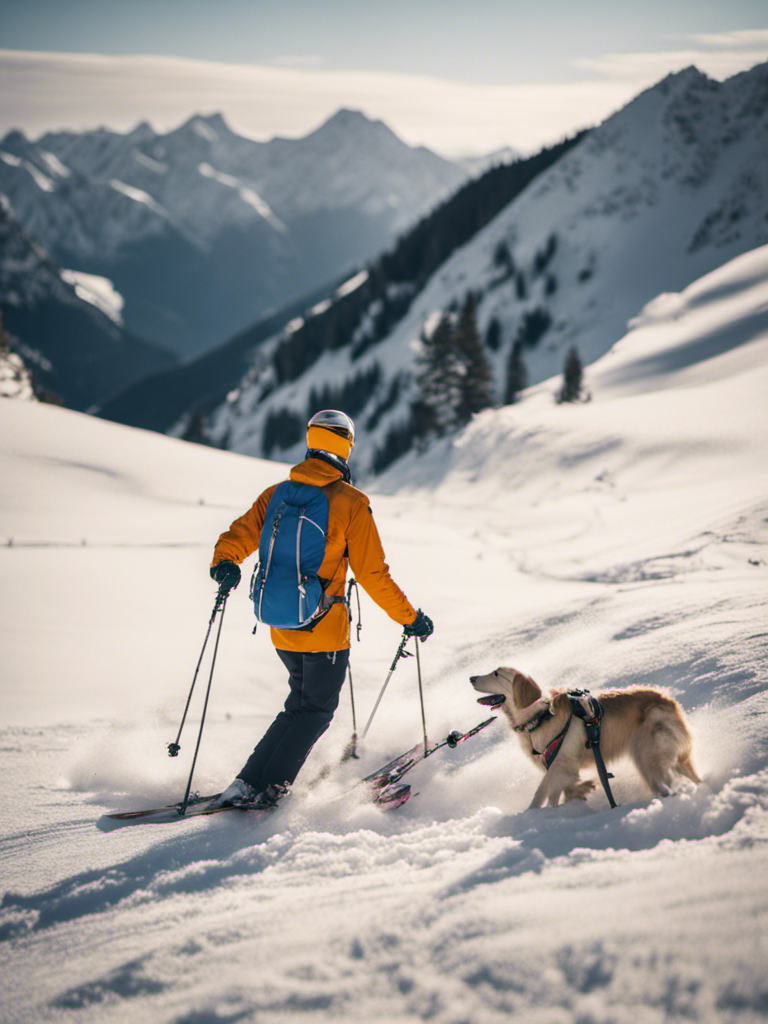

In [32]:
# Python Built-Ins:
import base64
import io
import json
import os
import sys

# Ensure the "data" directory exists, or create it if it doesn't
os.makedirs("data", exist_ok=True)

# Assuming `base_64_img_str` contains a base64-encoded image string

# Decode the base64 image string and create a PIL Image
stability_imageout = Image.open(io.BytesIO(base64.decodebytes(bytes(base_64_img_str, "utf-8"))))

# Save the PIL Image as a PNG file in the "data" directory
stability_imageout.save("data/alps_img.png")

# Display the saved image (optional, not required for saving)
stability_imageout